# **Import Libraries & Load Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
data = pd.read_csv('titanic.csv')

# Show the first few rows
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# **2. Data Preprocessing**

**a. Handle Missing Data:**

In [2]:
# Check missing values
print(data.isnull().sum())

# Fill missing values for 'Age' with median value and 'Embarked' with the mode
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop the 'Cabin' column as it has too many missing values
data.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<ipython-input-2-75b295d72562>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-2-75b295d72562>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

**b. Convert Categorical Data (One-Hot Encoding):**

In [3]:
# Convert 'Sex' and 'Embarked' into numeric format using One-Hot Encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Show the updated data
print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare  Sex_male  Embarked_Q  Embarked_S  
0   7.8292      True        True       False  
1   7.0000     False       False        True  
2   9.6875      True        True       False  
3   8.6625      True       False        True  
4  12.2875     False       False        True  


In [4]:
data['Family_Size'] = data['SibSp'] + data['Parch']
data.drop(columns=['SibSp', 'Parch'], inplace=True)

# Check the data
print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age   Ticket     Fare  \
0                              Kelly, Mr. James  34.5   330911   7.8292   
1              Wilkes, Mrs. James (Ellen Needs)  47.0   363272   7.0000   
2                     Myles, Mr. Thomas Francis  62.0   240276   9.6875   
3                              Wirz, Mr. Albert  27.0   315154   8.6625   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0  3101298  12.2875   

   Sex_male  Embarked_Q  Embarked_S  Family_Size  
0      True        True       False            0  
1     False       False        True            1  
2      True        True       False            0  
3      True       False        True            0  
4     False       False        True            2  


# **Survival Distribution Plots**

<ipython-input-30-08177295d254>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='viridis')


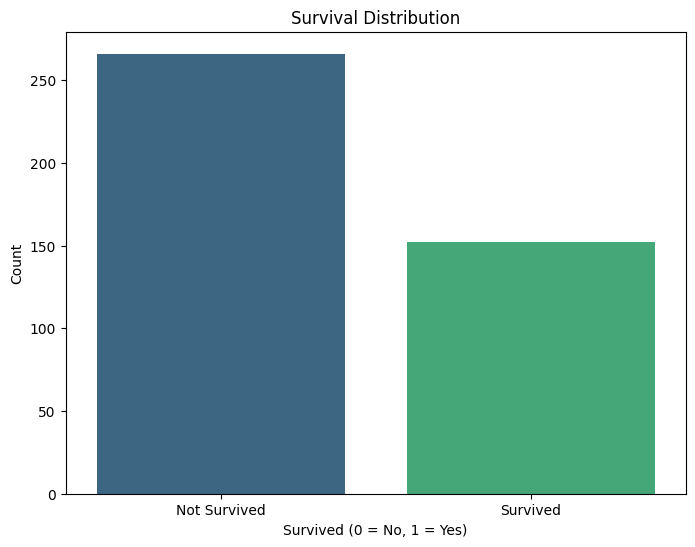

In [30]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()


<ipython-input-32-dfa543fb6fa5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None, palette='viridis')
<ipython-input-32-dfa543fb6fa5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None, palette='viridis')


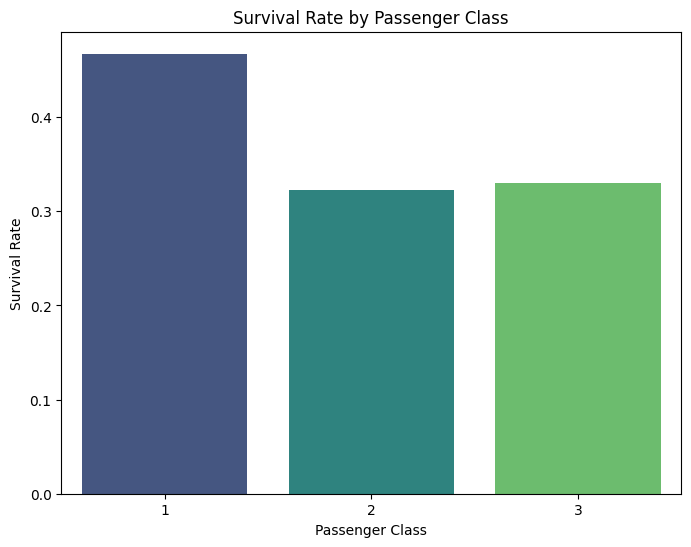

In [32]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


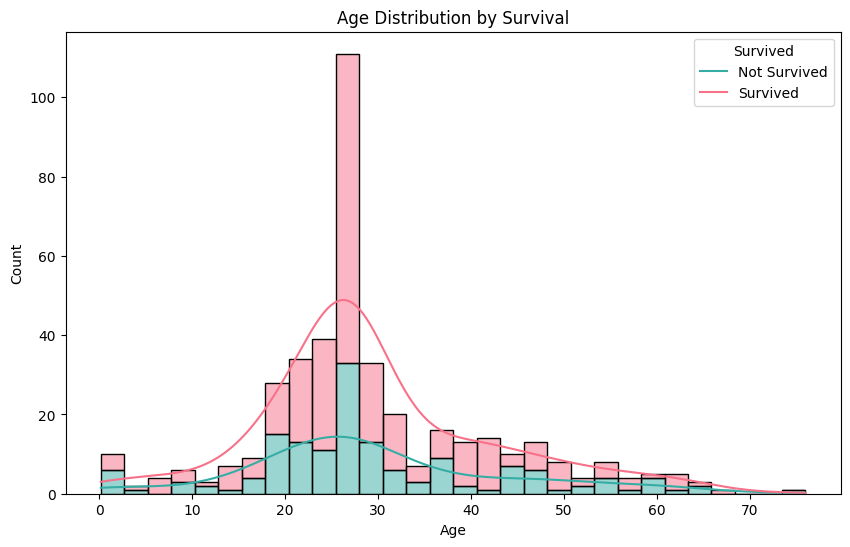

In [34]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30, palette='husl', multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


**Feature Importances**

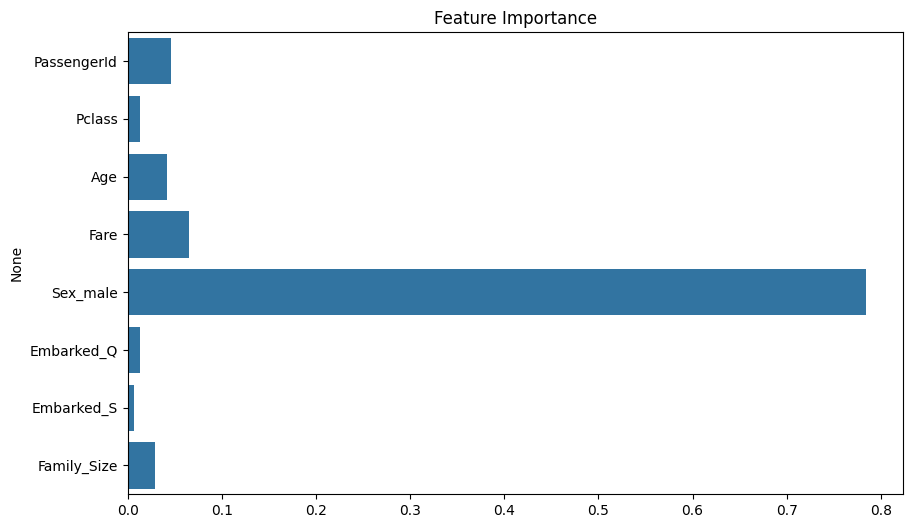

In [8]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_

# Visualize feature importance
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


**Splitting and Training**

In [5]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Survived', 'Name', 'Ticket'])  # Drop irrelevant columns
y = data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

**Confusion Matrix**

Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



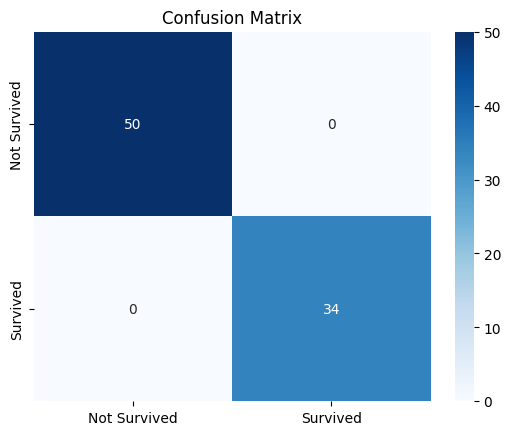

In [7]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()


**ROC Curve**

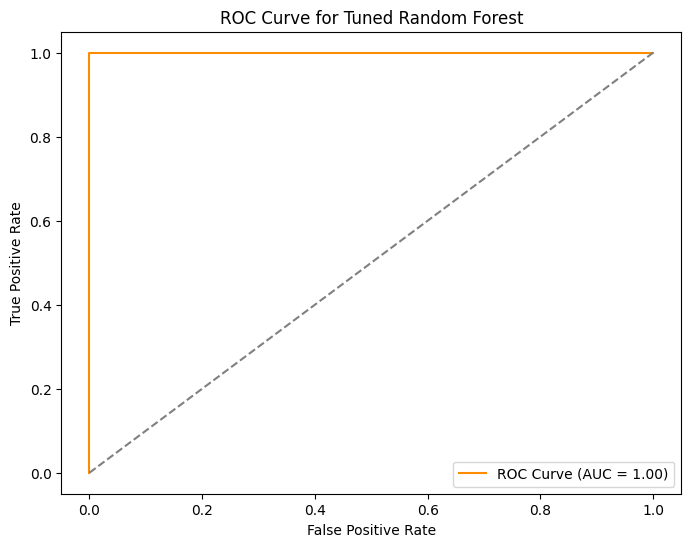

In [27]:
# ROC Curve Analysis
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
probs = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.title("ROC Curve for Tuned Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
# Print each parameter on a new line
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best Parameters:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50


**Accuracy After Training**

In [19]:
# Train the Random Forest model using the best hyperparameters from GridSearchCV
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions using the tuned model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.4f}")


Best Model Accuracy: 1.0000


**Accuracy After training**

In [39]:
from sklearn.metrics import classification_report

# Print the classification report for the tuned model
print("Classification Report - Tuned Model:")
print(classification_report(y_test, y_pred_best))


Classification Report - Tuned Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [28]:
# Cross-Validation for Robustness
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
